In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data_folder = "/home/molel/OneDrive/PhD/Potentiostat/Gavin"

In [3]:
datafile1 = os.path.join(data_folder, "Test 6 -0.2to0.6 scanrate20mVs electrode 3.xlsx")
datafile2 = os.path.join(data_folder, "Test 7 -0.2to0.6 scanrate20mVs electrode 5.xlsx")
nu = 20e-3  # V/s

In [4]:
df1 = pd.read_excel(datafile1, sheet_name='Sheet1')
df2 = pd.read_excel(datafile2, sheet_name='Sheet1')

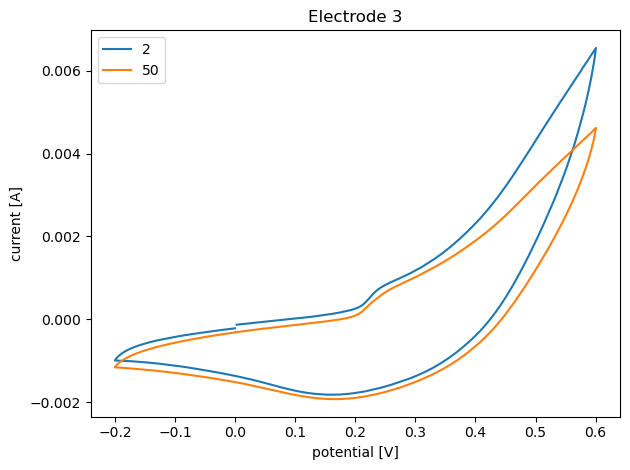

In [5]:
cycle2 = df1[df1['Scan']==2]
cycle20 = df1[df1['Scan']==20]
fig, ax = plt.subplots()
ax.plot(cycle2['Potential applied (V)'], cycle2['WE(1).Current (A)'], label='2')
ax.plot(cycle20['Potential applied (V)'], cycle20['WE(1).Current (A)'], label='50')
ax.set_xlabel('potential [V]')
ax.set_ylabel('current [A]')
ax.legend()
ax.set_title('Electrode 3')
plt.tight_layout()

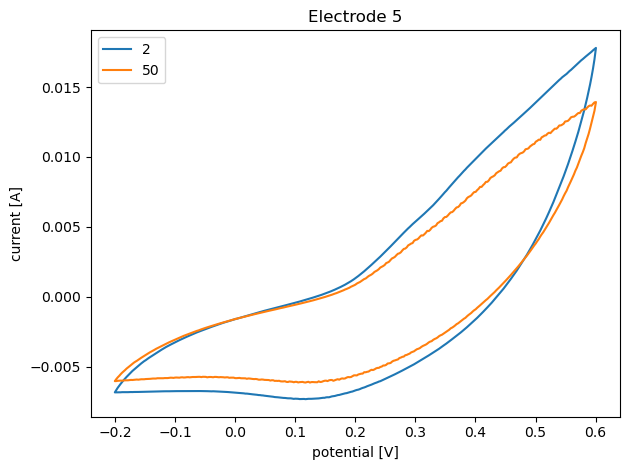

In [6]:
cycle2 = df2[df2['Scan']==2]
cycle20 = df2[df2['Scan']==20]
fig, ax = plt.subplots()
ax.plot(cycle2['Potential applied (V)'], cycle2['WE(1).Current (A)'], label='2')
ax.plot(cycle20['Potential applied (V)'], cycle20['WE(1).Current (A)'], label='50')
ax.set_xlabel('potential [V]')
ax.set_ylabel('current [A]')
ax.legend()
ax.set_title('Electrode 5')
plt.tight_layout()

Capacitance is defined by
\begin{equation}
C = \frac{Q}{V}
\end{equation}
where $Q = I t$ is charge stored. Recall that the current is a function of the potential, $I=I(V)$ although we may just write the current as $I$ to simplify the notation.
Therefore, capacitance can also be written as
\begin{equation}
C = \frac{I}{\nu}
\end{equation}
where $\nu = \frac{V}{t}$ is the voltage scan rate.

Area under the classic voltammogram is equivalently given by
\begin{equation}
\mathrm{Area}\equiv \int_{V_{\mathrm{min}}}^{V_{\mathrm{max}}}I(V)\mathrm{dV} = C\nu \int_{V_{\mathrm{min}}}^{V_{\mathrm{max}}}\mathrm{dV}
\end{equation}

Therefore, capacitance is given by
\begin{equation}
C = \frac{\mathrm{Area}}{\nu({V_{\mathrm{max}}} - {V_{\mathrm{min}}})}
\end{equation}

In [7]:
def area_under_curve(data):
 return np.trapz(y=data['WE(1).Current (A)'], x=data['Potential applied (V)'])

def cv_capacitance(data, scanrate=nu):
    V_min = np.min(data['Potential applied (V)'])
    V_max = np.max(data['Potential applied (V)'])
    Area = area_under_curve(data)
    return Area / (nu * (V_max - V_min))

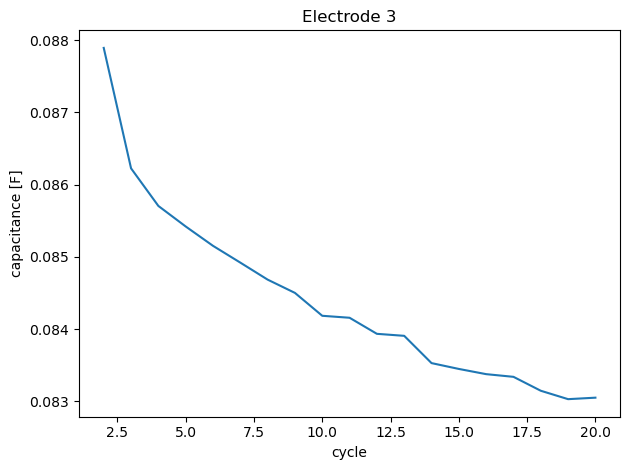

In [8]:
cycles = list(range(2, 21))
capacitance = []
for cycle in cycles:
    data = df1[df1['Scan']==cycle]
    capacitance.append(cv_capacitance(data))

fig, ax = plt.subplots()
ax.plot(cycles, capacitance)
ax.set_xlabel('cycle')
ax.set_ylabel('capacitance [F]')
ax.set_title('Electrode 3')
plt.tight_layout()

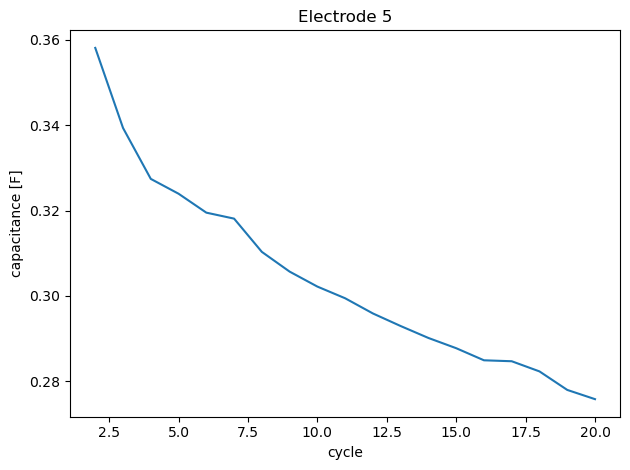

In [9]:
cycles = list(range(2, 21))
capacitance = []
for cycle in cycles:
    data = df2[df2['Scan']==cycle]
    capacitance.append(cv_capacitance(data))

fig, ax = plt.subplots()
ax.plot(cycles, capacitance)
ax.set_xlabel('cycle')
ax.set_ylabel('capacitance [F]')
ax.set_title('Electrode 5')
plt.tight_layout()